In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%reload_ext autoreload
from os import system
import subprocess
import numpy as np
import itertools as itt
import multiprocessing
import time
import math
import de_nn as de_nn
from scipy.stats import qmc
from numpy import *
import random
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
#import mxnet.ndarray as nd
#import mxnet as mx
from itertools import chain
import time
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import pred2
import pred
import matlab.engine

2024-05-01 14:38:52.236764: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-05-01 14:38:53.657405: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-05-01 14:38:53.658302: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-05-01 14:38:53.687384: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.683GHz coreCount: 15 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 238.66GiB/s
2024-05-01 14:38:53.687415: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-05-01 14:38:53.689266: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.1

ModuleNotFoundError: No module named 'matlabmultidimarrayforpython'

In [3]:
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
# gpus = tf.config.list_physical_devices('GPU')
# print(gpus)

In [52]:
D = 17
N_P=85
N_I=3
pi=math.pi

L = np.array([5,5,5,5,5,5,5,5,
                  10,10,10,10,10,10,10,10,
                  2*pi-5*pi/12]) #R1,R2,Phi1,Phi2,Alpha

U = np.array([25,25,25,25,25,25,25,25,
                  100,100,100,100,100,100,100,100,
                  2*pi-pi/12])

def create_population(L,U,N_P,N_I):
    pop = []
    count_isl = 0
    while count_isl < N_I:  
        pop1 = []
        count_pop = 0
        while count_pop < N_P:
            sol = np.zeros(D)
            for i in range(D):
                sol[i] = L[i] + qmc.LatinHypercube(d=1).random(n=1)*(U[i] - L[i])
            pop1.append(sol)
            count_pop += 1
        pop.append(pop1)
        count_isl += 1
    return(pop)

population = create_population(L,U,N_P,N_I)
print("Size of Population matrix:",np.shape(population))
# print("--                                             --")
# print("-------- Population(Mutant vector)--------------- ")
# print("--                                            --")
# # print(population[0])

Size of Population matrix: (3, 85, 17)


In [13]:
pat_tar = np.loadtxt('ant128patt_rect.txt',delimiter=',')
pat=np.reshape(pat_tar,(13,25,128))
aaa=np.swapaxes(pat,0,2)
aaa = aaa[55:65,:,:]
np.shape(aaa)
np.max(aaa)

5.93485513393762

In [14]:
aaa=aaa/10
aaa=10**aaa
np.max(aaa)

3.921800643038441

3.921800643038441


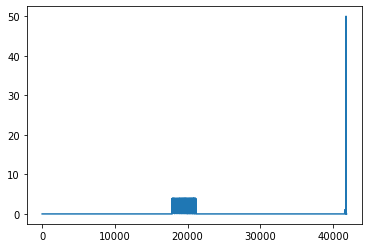

In [23]:
tgt1=np.zeros(41600)
y1_te=np.reshape(tgt1,(128,25,13))
# y1_te=np.swapaxes(y1_te,0,2)
y1_te[55:65,:,:] = aaa

target1=np.reshape(y1_te,(41600))
np.shape(target1)
target2 = np.ones(128)
target2[55:60] = 0.14
# target2[74:79] = 0.1
target3 = np.zeros(128)
target3[55:60] = 50
# target3[74:79] = 50

target = np.concatenate((target1,target2,target3),axis=0)
print(np.max(target1))
plt.plot((target))

In [14]:
# def get_mse3(pop, tar,n_i,n_p):
#     isl = np.array(list(chain.from_iterable(pop)))
#     Gtar = tar[0:41600]
#     Gtar = np.reshape(Gtar,(128,25,13))
#     Gtar = Gtar[52,:,:]
#     Star = tar[41600:41728]
#     Rtar = tar[41728:41856]
    
#     tar1 = np.tile(Gtar, (n_i*n_p,1,1,1))
#     tar2 = np.tile(Star, (n_i*n_p,1))
#     tar3 = np.tile(Rtar, (n_i*n_p,1))
    
#     y = pred.prediction(isl)
#     y1=y[:,0:41600]
#     y1=np.reshape(y1,(n_i*n_p,13,25,128))
#     y1=np.swapaxes(y1,1,3)
#     y1=y1[:,48:54,:,:]

#     y2=y[:,41600:41728]
#     y3=y[:,41728:41856]
# #     print(np.shape(Gtar),np.shape(tar1),np.shape(y1))
#     m_1 = np.mean(np.mean(np.mean((y1-tar1)**2, axis = 3), axis = 2), axis =1)
# #     m_1 = np.reshape(m_1,(n_i*n_p,325))
#     m_2 = np.mean((y2-tar2)**2, axis = 1)
#     m_3 = np.mean((y3-tar3)**2, axis = 1)
# #     print(np.shape(m_1),np.shape(m_2))
#     mse = 0.01*m_1 + m_2 + 0.01*m_3
#     print(m_1,m_2,m_3)
#     return np.reshape(mse,(n_i,n_p))

In [4]:
# isl = np.array(list(chain.from_iterable(population)))
# np.shape(isl)

(255, 17)

In [6]:
# pred.get_mse(population,target,N_I,N_P)
# np.shape(pred.get_mse(population,target,N_I,N_P))

(3, 85)

In [53]:
import datetime
t1 = datetime.datetime.now()
print(t1)
de_nn.de_isl(pred.get_mse3,target,L,U,num_layers_i = 17, num_isles = N_I, num_gens = 8,
	  poplist = population, mut = 0.8, crossp = 0.6, popsize = N_P,
	  its = 200 , lenp = 0.08, lins = 0.06, verbose = 0);
t2 = datetime.datetime.now() - t1
print('time_taken=',t2)

2024-05-01 15:17:58.893256
(3, 85, 17)
Epoch #:1
(3, 85)
Iteration =    0  -- 
===== [0.92689076 0.93884842 0.95730414] ======
Iteration =    1  -- 
===== [0.92689076 0.93884842 0.95730414] ======
Iteration =    2  -- 
===== [0.90230954 0.93884842 0.95730414] ======
Iteration =    3  -- 
===== [0.90230954 0.93884842 0.95730414] ======
Iteration =    4  -- 
===== [0.90230954 0.93884842 0.95730414] ======
Iteration =    5  -- 
===== [0.90230954 0.93749975 0.95730414] ======
Iteration =    6  -- 
===== [0.88123351 0.84599029 0.9198259 ] ======
Iteration =    7  -- 
===== [0.85489403 0.84599029 0.90708706] ======
Iteration =    8  -- 
===== [0.83227262 0.84599029 0.90022303] ======
Iteration =    9  -- 
===== [0.83227262 0.84599029 0.88742752] ======
Iteration =   10  -- 
===== [0.83227262 0.84599029 0.86201955] ======
Iteration =   11  -- 
===== [0.83227262 0.84599029 0.86201955] ======
Iteration =   12  -- 
===== [0.83227262 0.84599029 0.86201955] ======
Iteration =   13  -- 
===== [0.83

Iteration =  117  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  118  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  119  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  120  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  121  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  122  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  123  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  124  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  125  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  126  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  127  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  128  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  129  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  130  -- 
===== [0.59591898 0.58804462 0.59544997] ======
Iteration =  131  --

Iteration =   34  -- 
===== [0.56789432 0.56541951 0.56854889] ======
Iteration =   35  -- 
===== [0.56789432 0.56541951 0.56854889] ======
Iteration =   36  -- 
===== [0.56789432 0.56541951 0.56854889] ======
Iteration =   37  -- 
===== [0.56789432 0.56541951 0.56854889] ======
Iteration =   38  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   39  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   40  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   41  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   42  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   43  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   44  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   45  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   46  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   47  -- 
===== [0.56654984 0.56541951 0.56854889] ======
Iteration =   48  --

Iteration =    0  -- 
===== [0.5359561  0.54845086 0.53890476] ======
Iteration =    1  -- 
===== [0.5359561  0.54845086 0.53890476] ======
Iteration =    2  -- 
===== [0.5359561  0.54845086 0.53890476] ======
Iteration =    3  -- 
===== [0.5359561  0.54845086 0.53890476] ======
Iteration =    4  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =    5  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =    6  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =    7  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =    8  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =    9  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =   10  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =   11  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =   12  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =   13  -- 
===== [0.5359561  0.54845086 0.52681176] ======
Iteration =   14  --

Iteration =   16  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   17  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   18  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   19  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   20  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   21  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   22  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   23  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   24  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   25  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   26  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   27  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   28  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   29  -- 
===== [0.52681176 0.52586328 0.5282964 ] ======
Iteration =   30  --

Iteration =   31  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   32  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   33  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   34  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   35  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   36  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   37  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   38  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   39  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   40  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   41  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   42  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   43  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   44  -- 
===== [0.5214405  0.52088686 0.52681176] ======
Iteration =   45  --

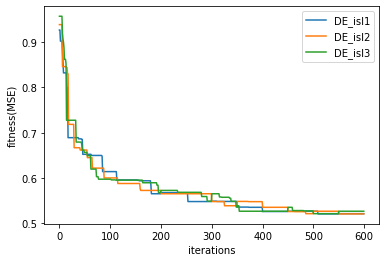

In [54]:
pf1=[]
pf2=[]
pf3=[]

with open ("Data_bfits.txt","r") as f:
    for line in f:
        p=line.split()
#         print(p[1])
        pf1.append(float(p[1][1:]))
        pf2.append(float(p[2][:]))
        pf3.append(float(p[3][:-1]))
    
plt.plot(pf1,label='DE_isl1')
plt.plot(pf2,label='DE_isl2')
plt.plot(pf3,label='DE_isl3')
plt.xlabel('iterations')
plt.ylabel('fitness(MSE)')
plt.legend()
plt.show()

In [47]:
# best = np.loadtxt('Data_best.txt')
# best = best[2999,:]
# print(best)

[ 18.577  21.277  29.918  12.963  26.073  10.     29.641  23.503  73.305
  24.096  46.577  17.402  62.106  48.466  88.395 100.      5.892]


In [55]:
sol = np.array([array([ 7.46303618, 14.35383854, 12.2879779 , 14.2375363 , 14.14233641,
        9.01365613, 25.        , 18.33347369, 96.81997908, 10.        ,
       18.10758191, 35.66291297, 53.88483363, 86.5299633 , 15.91302623,
       10.        ,  5.80538018]), array([ 5.        , 14.85516308,  9.58543928, 15.10358669, 16.37424293,
        8.88020257, 25.        , 19.59135526, 46.92775093, 10.        ,
       10.        , 59.54432919, 38.15157469, 79.19672761, 10.        ,
       10.        ,  5.91639834]), array([  5.        ,  14.94752757,  14.06537502,  14.30025884,
        15.91954404,   7.202401  ,  25.        ,  18.04066298,
        35.03810889,  65.63071105,  40.16686134,  33.39136097,
        65.67179698, 100.        ,  39.7576105 ,  10.        ,
         5.84695114])])

# solopt = np.array([array([ 17.3515956 ,  14.90611288,  25.13956546,  19.90165911,
#         27.24486305,  28.97076149,  21.2508792 ,  13.55396453,
#         39.84597655,  93.19549105,  62.67713434, 100.        ,
#         47.80938195,  67.41919086,  70.29225585,  20.46916329,
#          5.32039107]), array([ 18.48491946,  16.04874451,  25.81219576,  17.20866702,
#         28.98425548,  28.81982894,  19.80344775,  12.99084381,
#         61.47950577, 100.        ,  74.0670471 ,  88.14141564,
#         41.100817  ,  88.45656973,  67.14338269,  26.52991874,
#          5.29956596]), array([ 20.44747239,  15.48924396,  27.23915494,  17.06191934,
#         30.        ,  30.        ,  22.54158324,  10.59377144,
#         74.32638936, 100.        ,  88.44992711,  98.78340052,
#         65.75912886,  76.01650904,  81.62337645,  34.60995023,
#          5.22021075])])

# sol24optimum = np.array([array([10.33515377, 17.08185976, 21.77063437, 28.94121245, 16.10025555,
#        17.32437103, 25.86534132, 10.        , 35.46881045, 44.41356613,
#        97.54721006, 30.22488098, 10.88376268, 27.90454718, 10.        ,
#        10.        ,  5.60172158]), array([10.01174425, 17.08929798, 22.28243902, 28.51467249, 15.41956138,
#        17.71300651, 25.04835951, 10.        , 30.06779408, 41.38546592,
#        97.73241265, 26.9145646 , 12.49010717, 22.75788486, 10.23294989,
#        10.67860945,  5.65561008]), array([10.2990856 , 16.9337446 , 22.61721395, 29.06342086, 14.77065583,
#        17.15346828, 25.86174664, 10.        , 41.35411273, 53.47209214,
#        98.60433121, 26.05378626, 10.26620964, 29.93981886, 10.29507993,
#        23.13564845,  5.83560914])])


In [56]:
sol = np.reshape(sol,(3,17))
print(sol)

[[  7.46303618  14.35383854  12.2879779   14.2375363   14.14233641
    9.01365613  25.          18.33347369  96.81997908  10.
   18.10758191  35.66291297  53.88483363  86.5299633   15.91302623
   10.           5.80538018]
 [  5.          14.85516308   9.58543928  15.10358669  16.37424293
    8.88020257  25.          19.59135526  46.92775093  10.
   10.          59.54432919  38.15157469  79.19672761  10.
   10.           5.91639834]
 [  5.          14.94752757  14.06537502  14.30025884  15.91954404
    7.202401    25.          18.04066298  35.03810889  65.63071105
   40.16686134  33.39136097  65.67179698 100.          39.7576105
   10.           5.84695114]]


In [57]:
y=pred.prediction(sol)
np.shape(y)

(3, 41856)

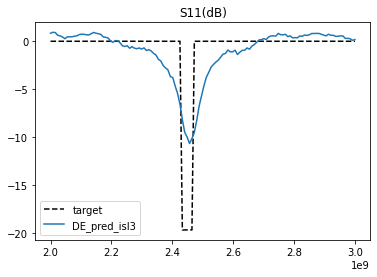

/tmp/ipykernel_25450/3958453588.py:28: RuntimeWarning: invalid value encountered in log
  ax2.imshow(10*log(patternD))


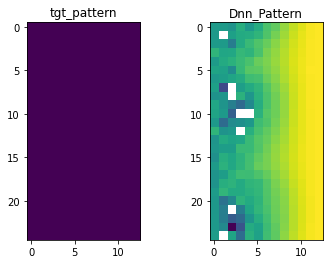

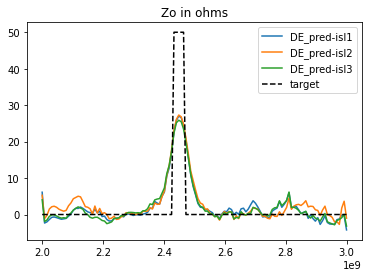

In [58]:
freq =np.linspace(2e9,3e9,128)
y1=y[:,0:41600]
y2=y[:,41600:41728]
y3=y[:,41728:41856]

# y2_te = np.reshape(target1,(1,13,25,128))
# y2_te=np.swapaxes(y2_te,1,3)
y1_te=np.reshape(y1,(3,13,25,128))
y1_te=np.swapaxes(y1_te,1,3)
tgt = np.reshape(target1,(1,128,25,13))

plt.plot(freq,10*log(target2),label='target',color ='black',ls ='--')
# plt.plot(freq,10*log(y2[0]),label='DE_pred_isl1')
# plt.plot(freq,10*log(y2[1]),label='DE_pred_isl2')
plt.plot(freq,10*log(y2[2]),label='DE_pred_isl3')
plt.title('S11(dB)')
plt.legend()
# plt.ylim(0,1)
plt.show()

ff=52
patternt = tgt[0,52,:,:]
patternD=y1_te[0,52,:,:]
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(patternt)
ax1.set_title('tgt_pattern')
ax2.imshow(10*log(patternD))
ax2.set_title('Dnn_Pattern')
plt.show()


#Imp 1D plot
plt.plot(freq,y3[0],label='DE_pred-isl1')
plt.plot(freq,y3[1],label='DE_pred-isl2')
plt.plot(freq,y3[2],label='DE_pred-isl3')
plt.plot(freq,target3,label='target',color ='black',ls ='--')
plt.title('Zo in ohms')
plt.legend()
# plt.ylim(0,1)
plt.show()

In [16]:
np.max(y1)

2.058249

In [85]:
# pattern1=y1_te[0,53,:,:]
# rr = np.random.randint(0,13)
# print(rr)
# phi = np.linspace(0, 2*np.pi, 25)
# plt.polar(phi, pattern1[:,rr])
# ax = plt.gca()
# ax.set_rticks([-10,-5, 0, 5, 10])
# ax.set_rlabel_position(75)
# plt.show()

# pat1=np.transpose(pattern1)
# phi = np.linspace(0, 2*np.pi,13)
# plt.polar(phi, pat1[:,rr])
# ax = plt.gca()
# ax.set_rticks([-10,-5, 0, 5, 10])
# ax.set_rlabel_position(75)
# plt.show()

/tmp/ipykernel_87407/1904733857.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(freq,10*log(y[2][41600:41728]),label='isl_3')
/tmp/ipykernel_87407/1904733857.py:5: RuntimeWarning: invalid value encountered in log
  plt.plot(freq,10*log(y[0][41600:41728]),label='isl_1')
/tmp/ipykernel_87407/1904733857.py:6: RuntimeWarning: invalid value encountered in log
  plt.plot(freq,10*log(y[1][41600:41728]),label='isl_2')


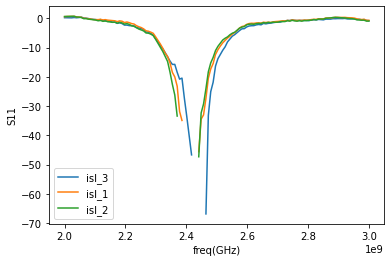

In [13]:
freq = np.linspace(2e9,3e9,128)
# plt.plot(freq,10*log(y[0]),label='isl_1')
# plt.plot(freq,10*log(y[1]),label='isl_2')
plt.plot(freq,10*log(y[2][41600:41728]),label='isl_3')
plt.plot(freq,10*log(y[0][41600:41728]),label='isl_1')
plt.plot(freq,10*log(y[1][41600:41728]),label='isl_2')
# plt.plot(freq,(target),label='target')
plt.xlabel('freq(GHz)')
plt.ylabel('S11')
plt.legend()
plt.show()

In [17]:
xy=pred2.polar_to_cartesian(sol)
# print(xy)
xy.shape
X=xy[:,0:8]
X = np.append(X[2,:],X[2,0])
Y = xy[:,8:16]
Y = np.append(Y[2,:],Y[2,0])
print(X,Y)

[ 0.0100136   0.01291179 -0.00410719 -0.02251433 -0.0249047  -0.01258224
  0.00058877  0.0069267   0.0100136 ] [ 0.00488889  0.01276754  0.02466031  0.0108676  -0.00218082 -0.02160295
 -0.00496521 -0.00570843  0.00488889]


In [18]:
np.savetxt('X_2.8.txt',X,fmt='%5.5f', delimiter = '\t')
np.savetxt('Y_2.8.txt',Y,fmt='%5.5f', delimiter = '\t')

In [19]:
eng = matlab.engine.start_matlab()
eng.ant128_trial(nargout=0)
eng.quit()

Starting parallel pool (parpool) using the 'Processes' profile ...
Connected to parallel pool with 8 workers.
Elapsed time is 151.035489 seconds.


In [20]:
patt1 = np.loadtxt('ant128patt_2.8.txt',delimiter=',')
# patt2 = np.loadtxt('ant128patt_2trial.txt',delimiter=',')
s11 = np.loadtxt('ant128S11_2.8.txt',delimiter=',')
# s12 = np.loadtxt('ant128S11_2trial2.4.txt',delimiter=',')
imp = np.loadtxt('ant128imp_2.8.txt',delimiter=',')
# imp2 = np.loadtxt('ant128imp_2trial.txt',delimiter=',')
zo = imp[0:128]
# Zo = imp2[0:128]
io = imp[128:256]
patt1.shape

(41600,)

In [21]:
patt=patt1/10
pat=10**patt
patt=np.reshape(pat,(1,13,25,128))
pat=np.swapaxes(patt,1,3)
patternM = pat[0,52,:,:]
np.max(patternM)

2.0509662278139613

/tmp/ipykernel_87407/3680134240.py:5: RuntimeWarning: invalid value encountered in log
  plt.plot(freq,10*log(y2[0]),label='S11 NN_predicted',linewidth=4,color = 'royalblue')


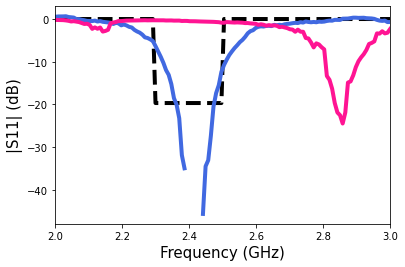

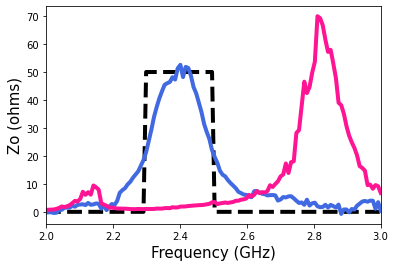

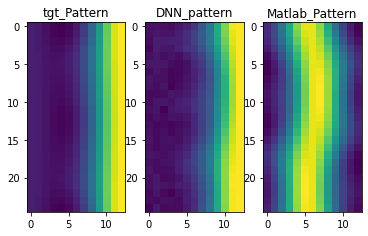

In [22]:
freq = np.linspace(2,3,128)
# plt.figure(figsize = (11, 8),dpi =300)

plt.plot(freq,10*log(target2),label='target_S11',linewidth=4,color = 'black',ls='--')
plt.plot(freq,10*log(y2[0]),label='S11 NN_predicted',linewidth=4,color = 'royalblue')
plt.plot(freq,s11,label='S11 EM_simulated',linewidth=4,color = 'deeppink')
# p=a+b+c
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Frequency (GHz)',fontsize=15)
plt.ylabel('|S11| (dB)',fontsize=15)
plt.xlim(2,3)
# plt.title('S11 of optimal design @2.4GHz',fontsize=30)
# plt.legend(fontsize=23)
plt.show()



# plt.figure(figsize = (11, 8),dpi=300)
plt.plot(freq,target3,label='target Z',linewidth=4,color = 'black',ls='--')
plt.plot(freq,y3[0],label='NN_predicted Z',linewidth=4,color = 'royalblue')
plt.plot(freq,zo,label='EM_simulated Z',linewidth=4,color = 'deeppink')
# plt.plot(freq,Zo,label='Z0_matlab')
# plt.plot(freq,io,label='EM_simulated I',linewidth=3,color = 'maroon')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Frequency (GHz)',fontsize=15)
plt.ylabel('Zo (ohms)',fontsize=15)
plt.xlim(2,3)
# plt.title('Impedance of optimal design @2.4GHz',fontsize=30)
# plt.legend(fontsize=23)
plt.show()

fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(patternt)
ax1.set_title('tgt_Pattern')
ax2.imshow(patternD)
ax2.set_title('DNN_pattern')
ax3.imshow(patternM)
ax3.set_title('Matlab_Pattern')
fig.show()

In [32]:
patt=10*log(patternt)
patD=10*log(patternD)
patM=10*log(patternM)
print(np.max(patt),np.max(patD),np.max(patM))

13.608091219447127 7.04246 6.738731116005199


In [33]:
aa = patt[13]
bb = np.flip(aa)
cc = np.append(aa,bb[1:])
xx = patD[13]
yy = np.flip(xx)
zz = np.append(xx,yy[1:])
pp = patM[13]
rr = np.flip(pp)
ss = np.append(pp,rr[1:])
np.shape(ss)

(25,)

In [53]:
# patt_tgt = np.loadtxt('ant128patt_tgt.txt',delimiter=',')
# pat=np.reshape(patt_tgt,(1,13,25,128))
# pat=np.swapaxes(pat,1,3)
# pattern2 = pat[0,52,:,:]
# pattern2.shape

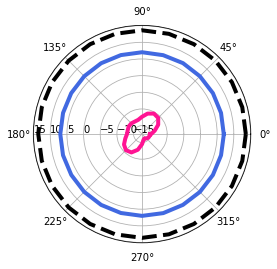

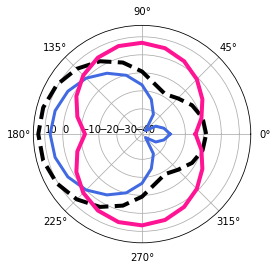

In [34]:
phi = np.linspace(0, 2*np.pi, 25)
# plt.figure(figsize = (11, 8),dpi =300)
plt.polar(phi, patt[:,12],label='target(az)',linewidth=4,color = 'black',ls='--' )
plt.polar(phi, patD[:,12],label='DNN',linewidth=4,color = 'royalblue' )
plt.polar(phi, patM[:,12],label='Matlab',linewidth=4,color = 'deeppink' )
ax = plt.gca()
# ax.set_rticks([-3,0,3,5,10])
ax.set_rlabel_position(180)
# plt.legend()
plt.show()
phi = np.linspace(0, 2*np.pi, 25)
# # plt.figure(figsize = (11, 8),dpi =300)
plt.polar(phi, cc,label='target(el)',linewidth=4,color = 'black',ls='--' )
plt.polar(phi, zz,label='DNN',linewidth=3,color = 'royalblue' )
plt.polar(phi, ss,label='Matlab',linewidth=4,color = 'deeppink' )
# # 
ax = plt.gca()
# ax.set_rticks([-3,0,3,5,10])
ax.set_rlabel_position(180)
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


17 7


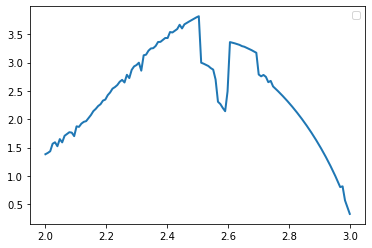

In [49]:
rr = np.random.randint(0,25)
ff = np.random.randint(0,13)
print(rr,ff)
plt.plot(freq,patt[0,:,0,12],linewidth=2)
# plt.ylim(0,1)
plt.legend()
plt.show()

11


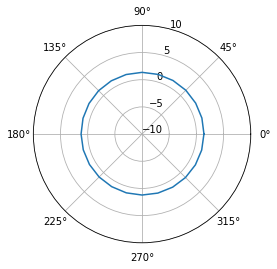

NameError: name 'pat_mat' is not defined

In [50]:
rr = np.random.randint(0,13)
print(rr)
phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, pattern1[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()

phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, pat_mat[:,rr])
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()

In [2]:
patt2 = np.loadtxt('ant128patt_2trial.txt',delimiter=',')
patt = np.reshape(patt2,(1,13,25,128))
patt=np.swapaxes(patt,1,3)
print(np.max(patt2))

3.32733887375688


In [3]:
patt3 = np.loadtxt('ant128patt_trial.txt',delimiter=',')
patt3 = np.reshape(patt3,(1,13,25,128))
patt4=np.swapaxes(patt3,1,3)
print(np.max(patt4),np.shape(patt4))


1.27915575072376 (1, 128, 25, 13)


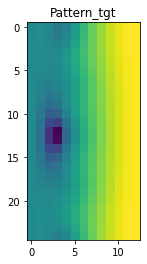

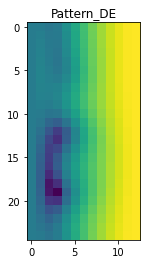

In [4]:
pat_mat = patt[0,52,:,:]
plt.figure
plt.imshow(pat_mat)
plt.title('Pattern_tgt')
plt.show()
pat_3 = patt4[0,52,:,:]
plt.figure
plt.imshow(pat_3)
plt.title('Pattern_DE')
plt.show()

In [5]:
np.shape(pat_mat[13,:])

aa = pat_mat[13]
xx = pat_3[13]
yy = np.flip(xx)
zz = np.append(xx,yy)
bb = np.flip(aa)
cc = np.append(aa,bb)
print(aa, '\n', bb, '\n', cc,'\n', xx, '\n', yy, '\n', zz )


[-11.74365432 -14.38173218 -20.9656087  -24.38539135 -15.24464669
 -10.61961579  -7.4011765   -4.71295081  -2.31392122  -0.21476069
   1.47665329   2.63715908   3.17211806] 
 [  3.17211806   2.63715908   1.47665329  -0.21476069  -2.31392122
  -4.71295081  -7.4011765  -10.61961579 -15.24464669 -24.38539135
 -20.9656087  -14.38173218 -11.74365432] 
 [-11.74365432 -14.38173218 -20.9656087  -24.38539135 -15.24464669
 -10.61961579  -7.4011765   -4.71295081  -2.31392122  -0.21476069
   1.47665329   2.63715908   3.17211806   3.17211806   2.63715908
   1.47665329  -0.21476069  -2.31392122  -4.71295081  -7.4011765
 -10.61961579 -15.24464669 -24.38539135 -20.9656087  -14.38173218
 -11.74365432] 
 [-14.94506314 -16.79587511 -20.61259821 -22.69343008 -18.15906862
 -13.82305305 -10.28585842  -7.20160618  -4.50770391  -2.25464627
  -0.51659127   0.63670964   1.15563926] 
 [  1.15563926   0.63670964  -0.51659127  -2.25464627  -4.50770391
  -7.20160618 -10.28585842 -13.82305305 -18.15906862 -22.693430

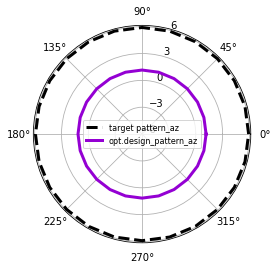

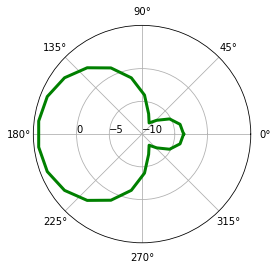

In [12]:
phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, pat_mat[:,12],label='target pattern_az',linewidth=3,color = 'black',ls='--' )
plt.polar(phi, pat_3[:,12],label='opt.design_pattern_az',linewidth=3,color = 'darkviolet')
ax = plt.gca()
ax.set_rticks([-6,-3, 0, 3, 6])
ax.set_rlabel_position(75)
plt.legend(fontsize=8)
plt.show()
# pat2=np.transpose(pat_mat)
phi = np.linspace(0, 2*np.pi,26)
plt.polar(phi, cc,linewidth=3,label='target pattern_el',color = 'green',)
# plt.polar(phi,  zz,label='opt. design_pattern_el',linewidth=4,color = 'darkviolet')
ax = plt.gca()
ax.set_rticks([-10, -5, 0])
ax.set_rlabel_position(180)
# plt.legend(fontsize=8)
plt.show()

In [24]:
aaa = np.tile(aa, (25,1))
np.shape(aaa)

(25, 13)

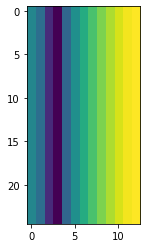

In [25]:
plt.imshow(aaa)

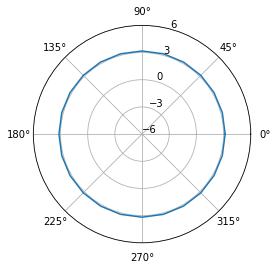

NameError: name 'cc' is not defined

In [5]:
phi = np.linspace(0, 2*np.pi, 25)
plt.polar(phi, aaa[:,12])
ax = plt.gca()
ax.set_rticks([-6,-3, 0, 3, 6])
ax.set_rlabel_position(75)
plt.show()
# pat2=np.transpose(pat_mat)
phi = np.linspace(0, 2*np.pi,26)
plt.polar(phi, cc)
plt.polar(phi,zz)
ax = plt.gca()
ax.set_rticks([-10,-5, 0, 5, 10])
ax.set_rlabel_position(75)
plt.show()

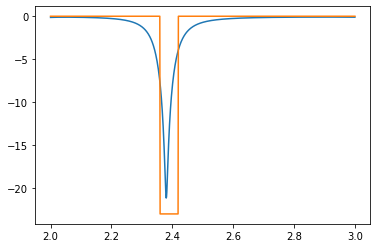

In [50]:
S11 = np.loadtxt('S11.txt')
target2 = np.ones(1001)
target2[360:420] = 0.1 
freq = np.linspace(2,3,1001)
# plt.plot(S11)
# plt.show()
plt.plot(freq,S11[:,1])
plt.plot(freq,10*log(target2))

In [72]:
pop = np.array(population)
population = pop[0,:,:]
np.shape(population)

(85, 17)

In [76]:
tar=target
n_i=1
n_p =85

In [78]:
import numpy as np
import scipy
from scipy.optimize import differential_evolution

# Define the objective function to be minimized
# def objective_function(x):
#     # Example objective function: Rosenbrock's function
#     return sum(100.0 * (x[1:] - x[:-1]*2.0)*2.0 + (1 - x[:-1])*2.0)

# Define the bounds for each parameter (variables)
bounds = [(10,29),(10,29),(10,29),(10,29),(10,29),(10,29),(10,29),(10,29),(10,100),(10,100),(10,100),(10,100),(10,100),(10,100),(10,100),(10,100),(2*pi-5*pi/12,2*pi-pi/12)]  # Adjust as needed for your problem

# Perform Differential Evolution optimization
result = differential_evolution(pred.get_mse3(population,target,N_I,N_P), bounds, strategy='best1bin', popsize=85, maxiter=200, recombination=0.5,init='latinhypercube')

# Print the optimization result
print("Optimal Solution:", result.pred.get_mse3)
print("Optimal Value:", result.fun)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
import datetime
t1 = datetime.datetime.now()
print(t1)
de_nn.de_isl(pred.get_mse3,target,L,U,num_layers_i = 17, num_isles = N_I, num_gens = 8,
	  poplist = population, mut = 0.8, crossp = 0.5, popsize = N_P,
	  its = 200 , lenp = 0.08, lins = 0.06, verbose = 0);
t2 = datetime.datetime.now() - t1
print('time_taken=',t2)

In [3]:
# eng.quit